In [ ]:
from zipfile import ZipFile

import numpy as np
import matplotlib.pyplot as plt
import os

# pandas to open data files & processing it.
import pandas as pd
# to see all columns
pd.set_option('display.max_columns', None)
# To see whole text
pd.set_option('max_colwidth', None)

import logging
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# keras for deep learning model creation
from keras.preprocessing.text import Tokenizer

import re
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras import models
from keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Flatten, TimeDistributed, Bidirectional, Dropout

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:
cd /content/grive/MyDrive/Colab Notebooks/NLP 2 Data/

/content/grive/MyDrive/Colab Notebooks/NLP 2 Data


In [ ]:
# Load Data

from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [ ]:
# Analysing Data

type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_train.size, X_test.size

(25000, 25000)

In [ ]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
#consolidating data for EDA

data = np.concatenate((X_train, X_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)

In [ ]:
# Length of sequences in Data

length = [len(i) for i in data]

print("Average review length: {}".format(np.mean(length)))
print("Standard deviation: {}".format(round(np.std(length))))
print("No of reviews with length below 301: {}".format(sum(i < 301 for i in length)))

Average review length: 234.75892
Standard deviation: 173
No of reviews with length below 301: 38583


In [ ]:
# Padding sequences to length of sentences equal

data_padded = pad_sequences(data, padding='post', maxlen=300)

In [ ]:
# Analysing padded sequences

print('Number of reviews: {}, Number of words in each review: {}'.format(data_padded.shape[0], data_padded.shape[1]))

Number of reviews: 50000, Number of words in each review: 300


In [ ]:
data_padded.size, label.size

(15000000, 50000)

In [ ]:
data_padded[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [ ]:
label[0]

1

In [ ]:
# Getting to print the first review by getting words from indices

index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data_padded[0]] )
print(decoded) 

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [ ]:
# Train-Test Split

train_X, test_X, train_y, test_y = train_test_split(data_padded, label, test_size=0.20, random_state=0)

In [ ]:
# Train-Test shape

train_X.shape, test_X.shape

((40000, 300), (10000, 300))

In [ ]:
from random import seed
seed(10)
from tensorflow.random import set_seed
set_seed(10)

In [ ]:
# Embedding, LSTM Model designing & Tuning

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=300))

#model.add(SpatialDropout1D(0.4))

# or units=100 also gives good result though 200 value gives better performance in terms of validation accuracy
model.add(LSTM(units=200, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)) # or units=100 also gives good result though 200 value gives better results

model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy']) #categorical_crossentropy
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 200)          240800    
                                                                 
 time_distributed (TimeDistr  (None, 300, 100)         20100     
 ibuted)                                                         
                                                                 
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 30001     
                                                                 
Total params: 1,290,901
Trainable params: 1,290,901
Non-trainable params: 0
______________________________________________

In [ ]:
train_y.shape

(40000,)

In [ ]:
type(train_y)

numpy.ndarray

In [ ]:
train_y = np.array(train_y)
type(train_y), train_y.shape

(numpy.ndarray, (40000,))

In [ ]:
# Model Training

history = model.fit(train_X, np.array(train_y), batch_size = 300, epochs=3, validation_split = 0.1, verbose=1)

Epoch 1/3
120/120 [==============================] - 895s 7s/step - loss: 0.4200 - accuracy: 0.7842 - val_loss: 0.3032 - val_accuracy: 0.8687
Epoch 2/3
120/120 [==============================] - 835s 7s/step - loss: 0.2265 - accuracy: 0.9096 - val_loss: 0.2730 - val_accuracy: 0.8857
Epoch 3/3
120/120 [==============================] - 816s 7s/step - loss: 0.1854 - accuracy: 0.9273 - val_loss: 0.2950 - val_accuracy: 0.8860


In [ ]:
# Model Performance Analysis

score,acc = model.evaluate(test_X, np.array(test_y), verbose = 2, batch_size = 300)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

34/34 - 48s - loss: 0.2904 - accuracy: 0.8873 - 48s/epoch - 1s/step
score: 0.29
acc: 0.89


In [ ]:
#test_X[0].shape, (test_X[0].reshape(-1,300)).shape

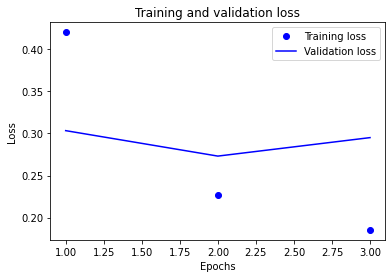

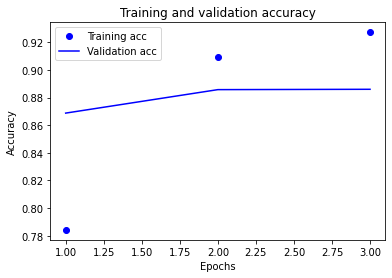

In [ ]:
# Epoch Vs Accuracy & Epoch Vs Loss

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Testing the first data of the test set

sentiment_predicted = model.predict(test_X[10].reshape(-1,300),batch_size=1,verbose = 2)[0]

if(sentiment_predicted <= 0.5):
    print("negative")
elif(sentiment_predicted > 0.5):
    print("positive")

1/1 - 0s - 419ms/epoch - 419ms/step
positive


In [ ]:
sentiment_predicted

array([0.70163184], dtype=float32)

In [ ]:
# Actual review (also a positive) to verify and compare with the prediction

index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
test_X_decoded = " ".join( [reverse_index.get(i - 3, "#") for i in test_X[10]] )
print(test_X_decoded)

# the head of a common new york family jane # as mary barton works with her younger sister # # as # barton at # candy store after ms # is # by dealers in the buying and selling of women as # slaves ms # and her policeman boyfriend matt moore as larry burke must rescue the virtue threatened young woman br br traffic in souls has a reputation that is difficult to support it isn't remarkably well done and it doesn't show anything very unique in having a young woman's virtue threatened by sex # perhaps it can be supported as a film which dealt with the topic in a greater than # length claimed to have been ten # originally the new york city location scenes are the main attraction after all these years the # of the prisoners behind bars is memorable because nothing else seems able to make the cameras move br br traffic in souls 11 24 13 george # tucker jane # matt moore # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #